# Tarea 4

## Implemenar una red neuronal utilizando Keras

En esta tarea vas a desarrollar una red neuronal utilizando el conjunto de datos Iris. 

En la clase 6 revisamos brevemente este dataset, si aún no tienes claro qué variables son dependientes e independientes puedes revisar la documentación del [dataset](https://archive.ics.uci.edu/ml/datasets/iris). 

La finalidad de esta tarea no es que encuentres el mejor modelo (aunque sería bueno que experimentes y encuentres uno bueno) si no que te familiarices con el uso de [Keras](https://keras.io/) y aprendas a utilizar su documentación.

En cada ejercicio agrega las celdas que necesites.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## I. Preparación de los datos

### Ejercicio 1:

1.1 Carga el [conjunto de datos Iris desde sklearn](https://scikit-learn.org/stable/datasets/toy_dataset.html)

1.2 Guarda los rasgos del conjunto de datos en la variable X

1.3 Guarda la salida del conjunto de datos en la variable y

Nota: Asegurate de tener instalada la libreria de sklearn

In [2]:
from sklearn import datasets
###

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

### Ejercicio 2

2.1 Verifica que el tipo de dato de X y y es un arreglo

2.2 Convierte los arreglos a dataframes de pandas y concatenalos para tener un dataframe como el siguiente:

| sepal_length | sepal_width | petal_length | petal_width | target |
| --- | --- | --- | --- | --- |
| 5.1 | 3.5 | 1.4 | 0.2 | 0 |
| 4.9 | 3.0 | 1.4 | 0.2 | 0 |

Hint: 

Si no sabes cómo convertir un arreglo en dataframe puedes buscar en google algo así: *how to convert numpy array to dataframe pandas*

Puedes generar un dataframe para las X y uno para las y y despues *juntarlos*. Si no sabes cómo hacer esto, puedes buscar una [cheat sheet de pandas](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf). (En particular puedes utilizar merge sobre el indice de los dataframes creados).

In [4]:
print(X.shape)
print(y.shape)
print(type(X), type(y))

(150, 4)
(150,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [5]:
lyx = pd.DataFrame(X, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
lyx

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
lyy = pd.DataFrame(y, columns=['target'])
lyy

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [7]:
ly = pd.concat([lyx, lyy], axis=1)
ly

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Ejercicio 3

3.1 Los datos estan ordenados de alguna manera?, si es así reordenalos de manera aleatoria. 

3.2 Utiliza el método describe para generar una tabla con información estadística

In [8]:
#Reordenamos dado que parece haber un orden en la columna 'target'
ly = ly.sample(frac=1)
ly

,sepal_length,sepal_width,petal_length,petal_width,target
87,6.3,2.3,4.4,1.3,1
114,5.8,2.8,5.1,2.4,2
13,4.3,3.0,1.1,0.1,0
142,5.8,2.7,5.1,1.9,2
73,6.1,2.8,4.7,1.2,1
...,...,...,...,...,...
147,6.5,3.0,5.2,2.0,2
134,6.1,2.6,5.6,1.4,2
14,5.8,4.0,1.2,0.2,0
9,4.9,3.1,1.5,0.1,0


In [9]:
ly.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Ejercicio 4

Realiza los histogramas de cada variable en el dataframe

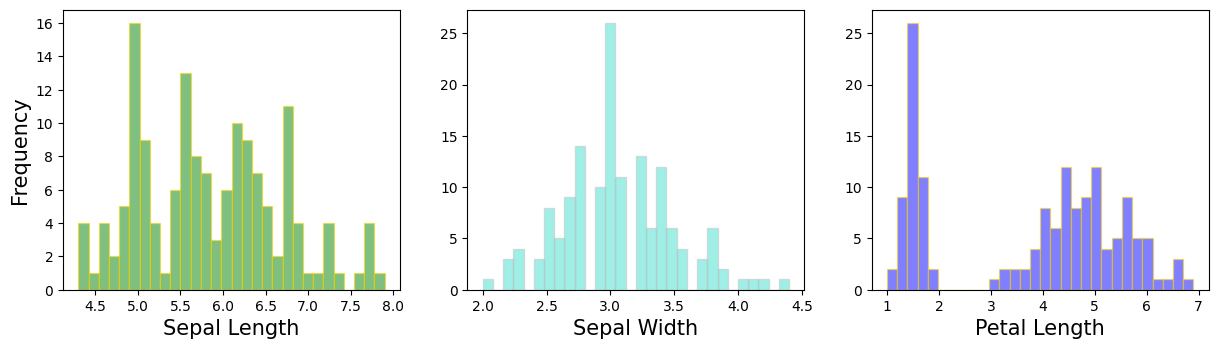

In [10]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)

ax1.hist(ly.sepal_length, bins=30, color='green',edgecolor='gold', alpha=0.5)
ax1.set_xlabel('Sepal Length', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(ly.sepal_width, bins=30, color='turquoise',edgecolor='silver', alpha=0.5)
ax2.set_xlabel('Sepal Width', size=15)

ax3.hist(ly.petal_length, bins=30, color='blue',edgecolor='gold', alpha=0.5)
ax3.set_xlabel('Petal Length', size=15);

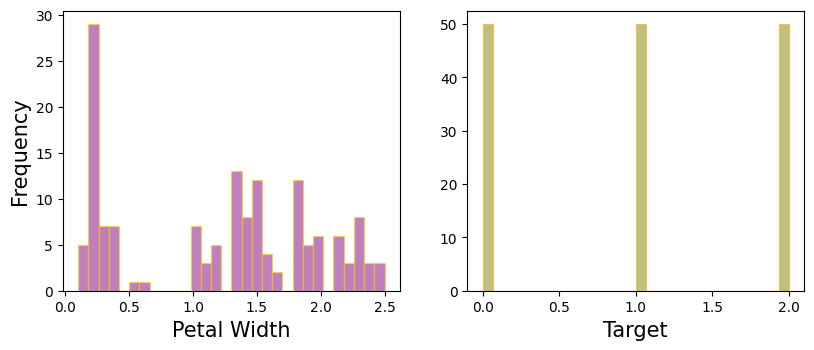

In [11]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)

ax1.hist(ly.petal_width, bins=30, color='purple',edgecolor='gold', alpha=0.5)
ax1.set_xlabel('Petal Width', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(ly.target, bins=30, color='olive',edgecolor='orange', alpha=0.5)
ax2.set_xlabel('Target', size=15);

### Ejercicio 5 

5.1 Separa el conjunto de datos en los conjuntos de entrenamiento (90%) y de prueba (10%). Muestra cuántas muestras tiene cada conjunto

5.2 Separa las variables independientes de las variables dependientes para el conjunto de prueba y el conjunto de entrenamiento. Revisa las dimensiones de cada conjunto

5.3 Normaliza los datos de entrenamiento y prueba (solo normaliza a las variables independientes)


In [12]:
test_ratio = 0.1

train_ratio = int((1.0-test_ratio)*len(ly.values[:,:]))

ly_train = ly.iloc[0:train_ratio,:]
ly_test  = ly.iloc[train_ratio:,:]

In [13]:
print(ly_train.shape)
print(ly_test.shape)

(135, 5)
(15, 5)


In [14]:
x_train = ly_train.values[:,:-1]
y_train = ly_train.values[:,-1:]
print(type(x_train), type(y_train))
print(x_train.shape)
print(y_train.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(135, 4)
(135, 1)


In [15]:
x_test = ly_test.values[:,:-1]
y_test = ly_test.values[:,-1:]
print(type(x_test), type(y_test))
print(x_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(15, 4)
(15, 1)


In [16]:
x_train_norm = (x_train - x_train.mean()) / x_train.std()
x_train_norm[0:5]

array([[ 1.44149089, -0.58970509,  0.4766728 , -1.09750409],
       [ 1.18759139, -0.33580559,  0.83213209, -0.53892519],
       [ 0.4258929 , -0.2342458 , -1.19906389, -1.70686288],
       [ 1.18759139, -0.38658549,  0.83213209, -0.79282469],
       [ 1.33993109, -0.33580559,  0.6290125 , -1.14828399]])

In [17]:
x_test_norm = (x_test - x_train.mean()) / x_train.std()
x_test_norm[0:5]

array([[ 2.15240948, -0.33580559,  1.64461048, -0.74204479],
       [ 0.88291199, -0.0311262 , -1.04672419, -1.65608298],
       [ 1.49227079, -0.38658549,  0.93369189, -0.79282469],
       [ 1.39071099, -0.64048499,  0.5274527 , -0.99594429],
       [ 1.18759139, -0.38658549,  0.83213209, -0.79282469]])

## II. Implementación de la red neuronal

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras import initializers
np.random.seed(1)

### Ejercicio 7

Implementa una red neuronal con dos capas ocultas. Completa la función **architecture** que define la arquitectura.

Cúantos nodos debe tener la capa de entrada?

Cuántos valores posibles puede tomar la variable **target**? Esto define el número de clases que tienes, y por lo tanto, el número de nodos en la capa de salida

En este caso vamos a realizar una clasificación (veremos a detalle esto en las siguientes clases) porque tenemos un target categorico, por lo que la última capa debe tener tantos nodos como salidas o clases.

Nota: si crees que el modelo funciona mejor con más o menos capas, modifica la función para agregar las capas que desees.

In [19]:
def architecture(n_hidden1, n_hidden2, initializer, activation, input_shape, classes):
    
    model = Sequential()
        
    model.add(Dense(units=n_hidden1,                 #units da el número de nodos 
                    kernel_initializer=initializer, # Initiallizacion de los pesos W
                    bias_initializer='zeros',        # Inicialización del bias
                    activation=activation,          # Función de activación
                    input_shape=input_shape,))      # Da el numero de nodos de la capa de entrada.
                                                     # Este número corresponde al número de rasgos X que definen
                                                     # al sistema de estudio
     
    model.add(Dense(units=n_hidden2,
                    kernel_initializer=initializer,
                    bias_initializer='zeros',
                    activation=activation,))  
    
    model.add(Dense(units=classes,
                    kernel_initializer=initializer,
                    bias_initializer='zeros',
                    activation = 'softmax'))
    
    return model

### Ejercicio 8

8.1 Llama a la función architecture para definir el modelo que vas a entrenar

8.2 Utiliza el metodo plot_model para visualizar un diagrama del modelo que definiste

8.3 Cuántos parametros (w y b) tiene el modelo que definiste (puedes calcularlo a mano o utilizar el método summary)

In [20]:
input_shape = (4,)
n_hidden1 = 4
n_hidden2 = 3
classes = 3
initializer = tf.keras.initializers.RandomUniform(minval=0., maxval=0.1)
#initializer="uniform"
#initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
activation = 'tanh'

model_keras = architecture(n_hidden1, n_hidden2, initializer, activation, input_shape, classes)

In [21]:
plot_model(model_keras, to_file='model.png', show_shapes=True, rankdir='TB', 
      expand_nested=True, show_layer_names=True, dpi=96)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [22]:
model_keras.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 12        
Total params: 47
Trainable params: 47
Non-trainable params: 0
_________________________________________________________________


### Ejercicio 9

9.1 Compila el modelo que definiste utilizando la función de costo y [métrica](https://keras.io/api/metrics/probabilistic_metrics/) [SparseCategoricalCrossentropy](https://keras.io/api/losses/probabilistic_losses/) 

Para el optimizador puedes probar algunos de los que se indican [aquí](https://keras.io/api/optimizers/), quedate con el que te dé mejor resultados.

In [28]:
lr = 0.015

optimizer = keras.optimizers.SGD(learning_rate=lr, momentum=0.0, nesterov=False)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
acc = tf.keras.metrics.SparseCategoricalCrossentropy()

model_keras.compile(loss=loss, 
              optimizer=optimizer,
              metrics=[acc])

### Ejercicio 10

9.1 Entrena el modelo utilizando el método fit()

9.2 Grafica el costo de entrenamiento y de validación con respecto a la época.

9.2 Grafica el accuracy de entrenamiento y de validación con respecto a la época.

Hint: revisa la salida del entrenamiento *history_model.history* 

In [29]:
import time
epochs = 200
start_time = time.time()
val_split=0.1

history_model = model_keras.fit(x_train_norm, y_train,
                          epochs=epochs,
                          batch_size=32,
                          validation_split=val_split, 
                          shuffle=True,
                          verbose=2)
end_time = time.time()
print("Time for training: {:10.4f}s".format(end_time - start_time))

Epoch 1/200
4/4 - 1s - loss: 1.0817 - sparse_categorical_crossentropy: 1.0817 - val_loss: 1.0806 - val_sparse_categorical_crossentropy: 1.0806
Epoch 2/200
4/4 - 0s - loss: 1.0811 - sparse_categorical_crossentropy: 1.0811 - val_loss: 1.0800 - val_sparse_categorical_crossentropy: 1.0800
Epoch 3/200
4/4 - 0s - loss: 1.0806 - sparse_categorical_crossentropy: 1.0806 - val_loss: 1.0794 - val_sparse_categorical_crossentropy: 1.0794
Epoch 4/200
4/4 - 0s - loss: 1.0800 - sparse_categorical_crossentropy: 1.0800 - val_loss: 1.0788 - val_sparse_categorical_crossentropy: 1.0788
Epoch 5/200
4/4 - 0s - loss: 1.0794 - sparse_categorical_crossentropy: 1.0794 - val_loss: 1.0781 - val_sparse_categorical_crossentropy: 1.0781
Epoch 6/200
4/4 - 0s - loss: 1.0789 - sparse_categorical_crossentropy: 1.0789 - val_loss: 1.0774 - val_sparse_categorical_crossentropy: 1.0774
Epoch 7/200
4/4 - 0s - loss: 1.0783 - sparse_categorical_crossentropy: 1.0783 - val_loss: 1.0767 - val_sparse_categorical_crossentropy: 1.0767

Epoch 58/200
4/4 - 0s - loss: 0.9548 - sparse_categorical_crossentropy: 0.9548 - val_loss: 0.9371 - val_sparse_categorical_crossentropy: 0.9371
Epoch 59/200
4/4 - 0s - loss: 0.9489 - sparse_categorical_crossentropy: 0.9489 - val_loss: 0.9305 - val_sparse_categorical_crossentropy: 0.9305
Epoch 60/200
4/4 - 0s - loss: 0.9427 - sparse_categorical_crossentropy: 0.9427 - val_loss: 0.9235 - val_sparse_categorical_crossentropy: 0.9235
Epoch 61/200
4/4 - 0s - loss: 0.9364 - sparse_categorical_crossentropy: 0.9364 - val_loss: 0.9164 - val_sparse_categorical_crossentropy: 0.9164
Epoch 62/200
4/4 - 0s - loss: 0.9297 - sparse_categorical_crossentropy: 0.9297 - val_loss: 0.9092 - val_sparse_categorical_crossentropy: 0.9092
Epoch 63/200
4/4 - 0s - loss: 0.9231 - sparse_categorical_crossentropy: 0.9231 - val_loss: 0.9017 - val_sparse_categorical_crossentropy: 0.9017
Epoch 64/200
4/4 - 0s - loss: 0.9162 - sparse_categorical_crossentropy: 0.9162 - val_loss: 0.8941 - val_sparse_categorical_crossentropy:

Epoch 115/200
4/4 - 0s - loss: 0.5956 - sparse_categorical_crossentropy: 0.5956 - val_loss: 0.5641 - val_sparse_categorical_crossentropy: 0.5641
Epoch 116/200
4/4 - 0s - loss: 0.5923 - sparse_categorical_crossentropy: 0.5923 - val_loss: 0.5611 - val_sparse_categorical_crossentropy: 0.5611
Epoch 117/200
4/4 - 0s - loss: 0.5892 - sparse_categorical_crossentropy: 0.5892 - val_loss: 0.5582 - val_sparse_categorical_crossentropy: 0.5582
Epoch 118/200
4/4 - 0s - loss: 0.5861 - sparse_categorical_crossentropy: 0.5861 - val_loss: 0.5554 - val_sparse_categorical_crossentropy: 0.5554
Epoch 119/200
4/4 - 0s - loss: 0.5831 - sparse_categorical_crossentropy: 0.5831 - val_loss: 0.5527 - val_sparse_categorical_crossentropy: 0.5527
Epoch 120/200
4/4 - 0s - loss: 0.5804 - sparse_categorical_crossentropy: 0.5804 - val_loss: 0.5501 - val_sparse_categorical_crossentropy: 0.5501
Epoch 121/200
4/4 - 0s - loss: 0.5775 - sparse_categorical_crossentropy: 0.5775 - val_loss: 0.5475 - val_sparse_categorical_crosse

Epoch 172/200
4/4 - 0s - loss: 0.4936 - sparse_categorical_crossentropy: 0.4936 - val_loss: 0.4770 - val_sparse_categorical_crossentropy: 0.4770
Epoch 173/200
4/4 - 0s - loss: 0.4926 - sparse_categorical_crossentropy: 0.4926 - val_loss: 0.4763 - val_sparse_categorical_crossentropy: 0.4763
Epoch 174/200
4/4 - 0s - loss: 0.4914 - sparse_categorical_crossentropy: 0.4914 - val_loss: 0.4756 - val_sparse_categorical_crossentropy: 0.4756
Epoch 175/200
4/4 - 0s - loss: 0.4904 - sparse_categorical_crossentropy: 0.4904 - val_loss: 0.4748 - val_sparse_categorical_crossentropy: 0.4748
Epoch 176/200
4/4 - 0s - loss: 0.4896 - sparse_categorical_crossentropy: 0.4896 - val_loss: 0.4741 - val_sparse_categorical_crossentropy: 0.4741
Epoch 177/200
4/4 - 0s - loss: 0.4885 - sparse_categorical_crossentropy: 0.4885 - val_loss: 0.4734 - val_sparse_categorical_crossentropy: 0.4734
Epoch 178/200
4/4 - 0s - loss: 0.4876 - sparse_categorical_crossentropy: 0.4876 - val_loss: 0.4727 - val_sparse_categorical_crosse

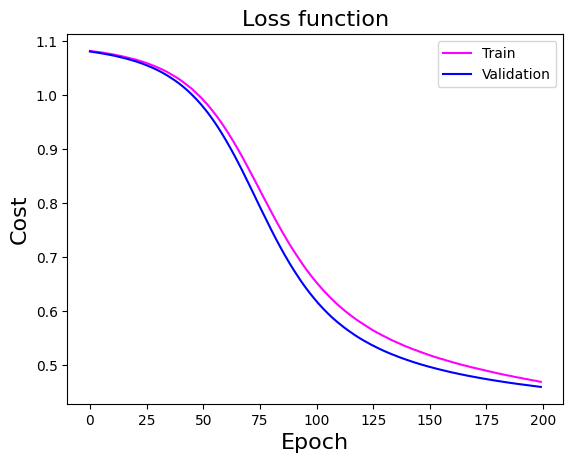

In [30]:
plt.plot(history_model.history['loss'], 'magenta')
plt.plot(history_model.history['val_loss'], 'blue')
plt.title('Loss function', size=16)
plt.ylabel('Cost', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['Train', 'Validation'], loc='upper right');

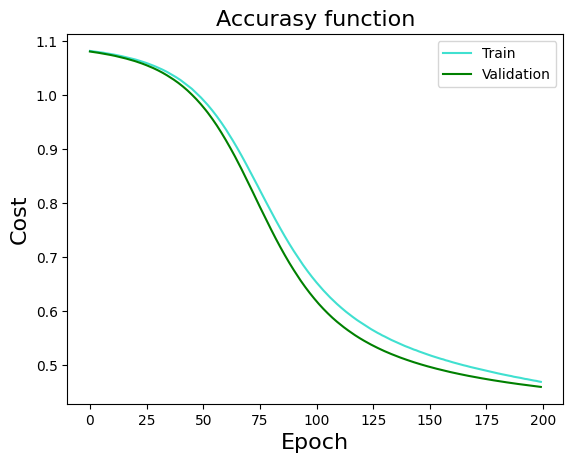

In [31]:
plt.plot(history_model.history['sparse_categorical_crossentropy'], 'turquoise')
plt.plot(history_model.history['val_sparse_categorical_crossentropy'], 'green')
plt.title('Accurasy function', size=16)
plt.ylabel('Cost', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['Train', 'Validation'], loc='upper right');

### Ejercicio 11

Evalúa tu modelo utilizando los datos de prueba y el método evaluate()

In [32]:
scores = model_keras.evaluate(x_test_norm, y_test)
print('Test loss:', scores[0])

1/1 [==============================] - 0s 31ms/step - loss: 0.4753 - sparse_categorical_crossentropy: 0.4753
Test loss: 0.47526150941848755
